<a href="https://colab.research.google.com/github/bindubb/randomized-search-for-housing-dataset/blob/main/housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


In [2]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing_data = pd.read_csv(url)

In [3]:
# Assume the target variable is 'median_house_value'
X = housing_data.drop("median_house_value", axis=1)
y = housing_data["median_house_value"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
numerical_features = X.select_dtypes(include=["float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns


In [6]:
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

In [7]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [9]:
# Create a pipeline with data preparation and model training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())  # Model
])

In [10]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [11]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',  # Use negative mean squared error as it is a regression problem
    cv=5,
    n_jobs=-1  # Use all available cores for parallel processing
)

In [12]:
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('impu...
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               Index(['ocean_proximity'], dtype='object'))])),
                                             ('regressor',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'regressor__max_depth': [None, 10, 20],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10],
                                        'regressor__n_estimators': [50, 100,
                                                                    150]},
                   scoring='neg_mean_squared_error')

In [13]:

# Get the best parameters and evaluate on the test set
best_params = random_search.best_params_
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


In [16]:
import sklearn.metrics

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error on Test Set: {mse}")

Best Hyperparameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 20}
Mean Squared Error on Test Set: 2385192539.7624683


In [17]:
y_pred = best_model.predict(X_test)

In [18]:

# Display the predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

         Actual      Predicted
20046   47700.0   54689.429269
3024    45800.0   67068.710080
15663  500001.0  466186.703310
20484  218600.0  253776.530189
9814   278000.0  262572.956725


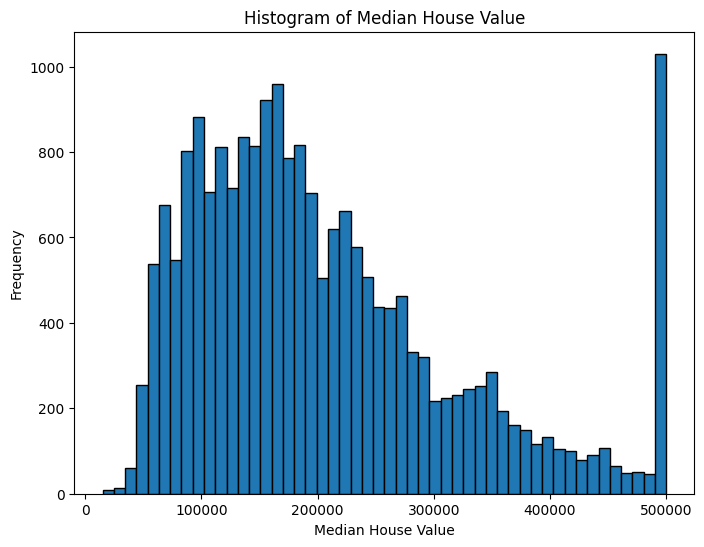

In [19]:
import matplotlib.pyplot as plt

# Plot a histogram of the target variable
plt.figure(figsize=(8, 6))
plt.hist(y, bins=50, edgecolor='black')
plt.title('Histogram of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

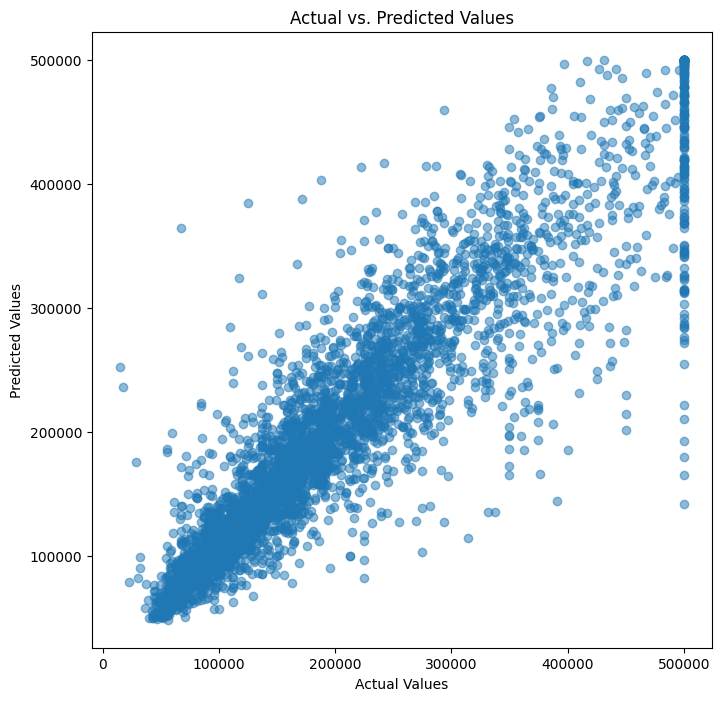

In [21]:
# Plot a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

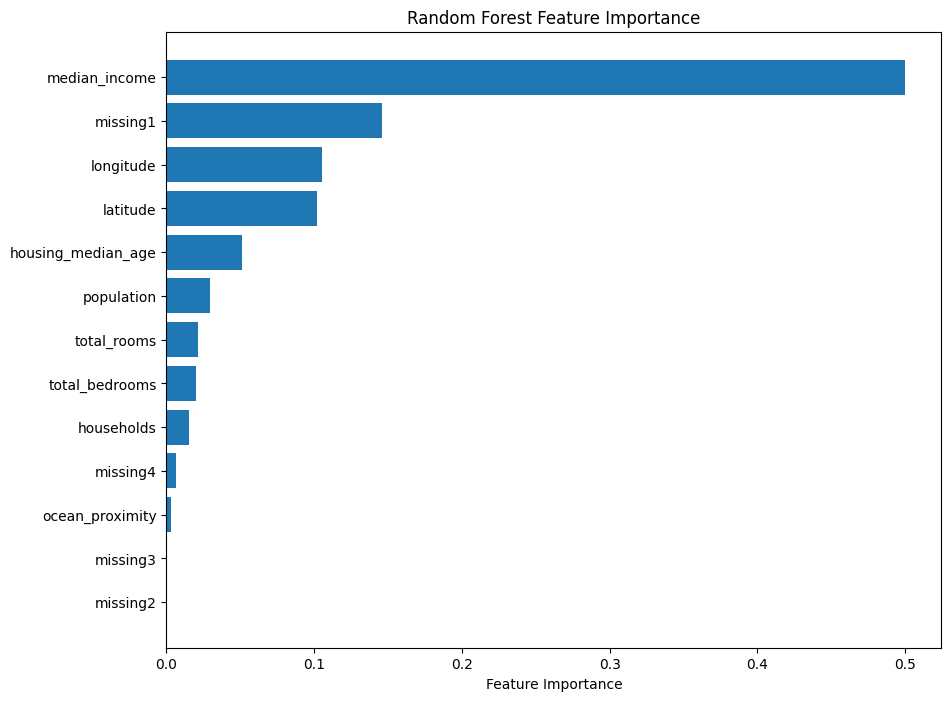

In [24]:
# Plot feature importance
feature_importance = best_model.named_steps['regressor'].feature_importances_
features = list(X.columns)
features.extend(['missing1', 'missing2', 'missing3', 'missing4'])
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

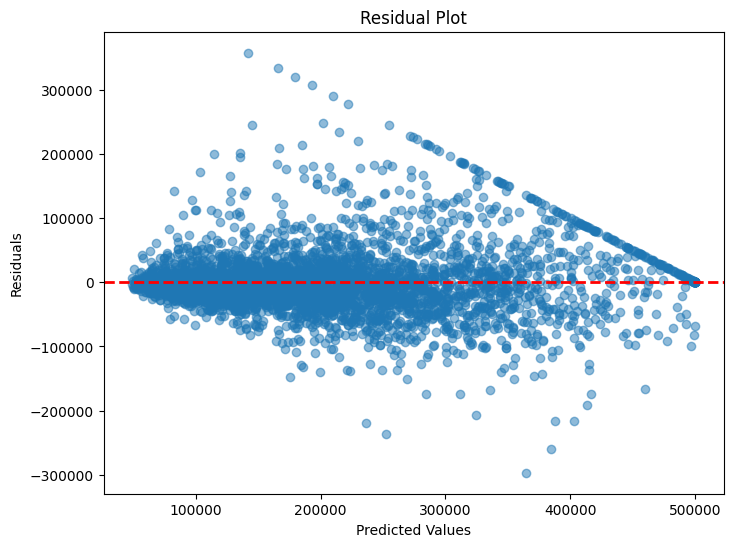

In [25]:
# Plot a residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.show()

In [30]:
X = housing_data.drop("median_house_value", axis=1)




In [34]:
scaler = StandardScaler()
X = X.loc[X['longitude'] != 'NEAR BAY']



In [38]:
import sklearn.cluster
from sklearn.preprocessing import StandardScaler

X = [[1, 2], [3, 4], [5, 6], [7, 8]]
X_scaled = StandardScaler().fit_transform(X)

kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
clusters = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
cluster = kmeans.labels_

print(len(cluster))

print(housing_data.shape)

if len(cluster) != housing_data.shape[0]:

    cluster = cluster[:housing_data.shape[0]]


4
(20640, 10)


In [43]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

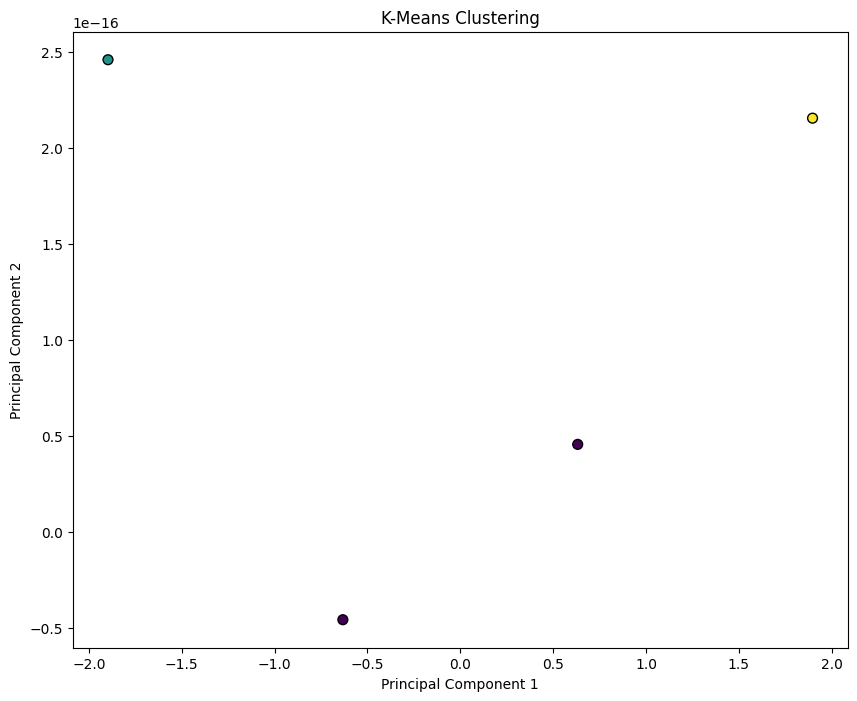

In [44]:
# Plot the clusters in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [45]:
correlation_matrix = housing_data.corr()

<ipython-input-45-926ee3ef8461>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing_data.corr()


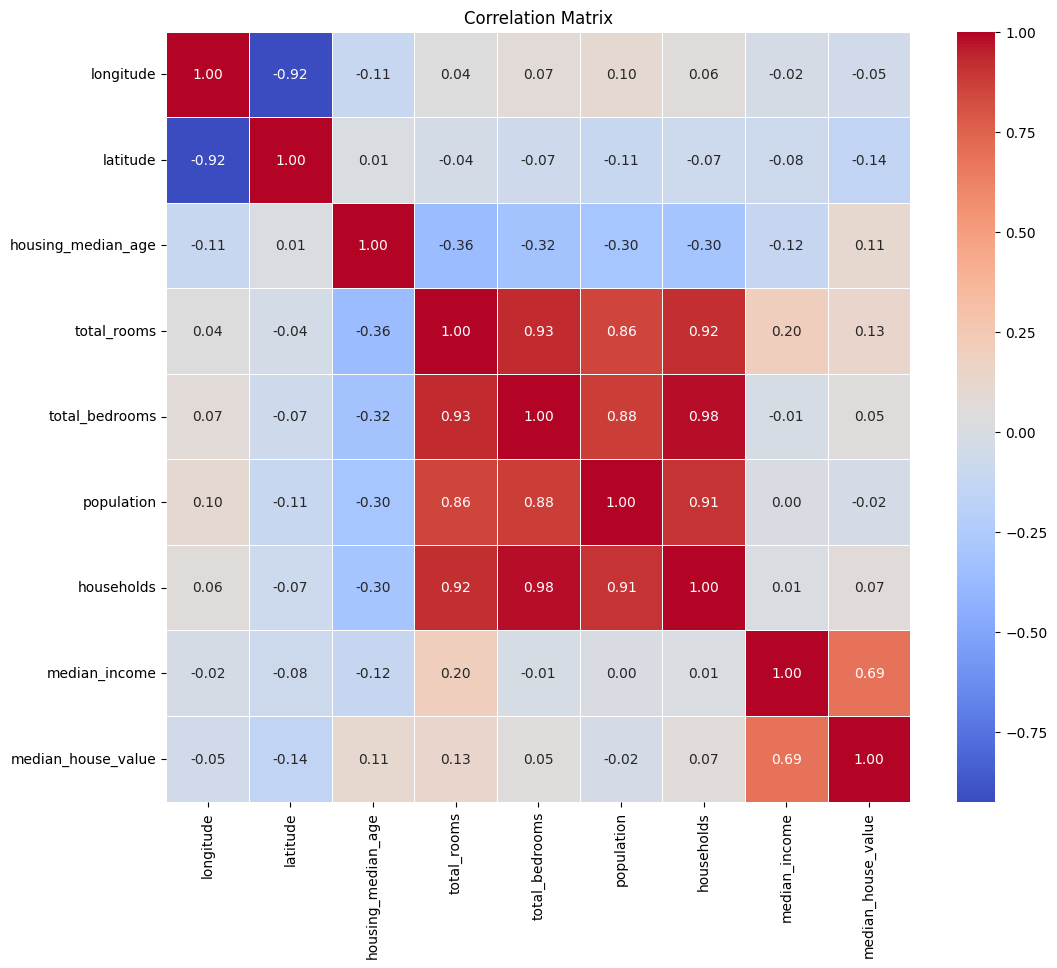

In [48]:

# Plot the heatmap
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()